In [1]:
!pip install sklearn
!pip install typing_extensions
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from PIL import Image
import json
import random
from sklearn.model_selection import KFold
from sklearn.feature_extraction import image
from pathlib import Path
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import pickle
import cv2
from fnmatch import fnmatch
from torch.utils.data import Dataset, ConcatDataset

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [2]:
from torchvision import transforms
#180 x 180 comes from the paper
#there is something mentioned about
transform_OG=transforms.Compose([transforms.ToTensor(), 
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             transforms.Resize((180,180)),
                             transforms.Grayscale()
                             ])
# transform_15=transforms.Compose([transforms.ToTensor(), 
                                 
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                  transforms.Resize((180,180)),
#                                  transforms.Grayscale()
#                                 ])
# transform_25=transforms.Compose([transforms.GaussianBlur(3, 25),
#                                 transforms.ToTensor(), 
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                  transforms.Resize((180,180)),
#                                  transforms.Grayscale()
#                                 ])
# transform_50=transforms.Compose([transforms.GaussianBlur(3, 50),
#                                 transforms.ToTensor(), 
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                  transforms.Resize((180,180)),
#                                  transforms.Grayscale()
#                                 ])

In [3]:
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """

'\n  y is the noisy image and it is used as input\n\n  x is the noiseless image and it is used as a target label\n'

In [4]:
device=torch.device('cuda:0')
def image_Work(root,transform1):
  data=[]
  #Need to make sure that the data and label are linked to each other right?
  #Should be fine if we don't shuffle
  count = 0
  for img in os.listdir(root):
    if (count % 100 == 0):
        print(count)
    count += 1
    loaded = Image.open(os.path.join(root,img))
    no_noise = transform1(loaded)
    no_noise = no_noise.cpu().detach().numpy()
    clean = image.extract_patches_2d(no_noise[0], (40, 40))[:1600,:,:]
    data.append(clean)

  data = np.reshape(data, (len(data)*data[0].shape[0], 40, 40))
  return torch.from_numpy(data)

In [5]:
path="BSDS300/images/train"
data=image_Work(path,transform_OG)
# data25=image_Work(path,transform_OG, 25)
# data50=image_Work(path,transform_OG, 50)

0
100


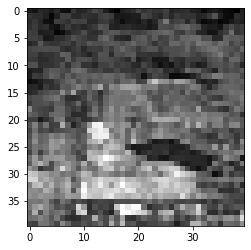

In [6]:
plt.figure(1)
plt.imshow(data[0].cpu(), cmap='gray')

In [7]:
p=open("train.pkl","wb")
pickle.dump(data,p)
p.close()

del data

In [8]:
path="BSDS300/images/test"
test=image_Work(path,transform_OG)

0


In [9]:
t=open("test.pkl","wb")
pickle.dump(test,t)
t.close()